# Batch Lever Press Analysis

### Notebook for processing and analyzing lever press behavior
Allows for processing, summarizing, and analysis of lever behavior across all sessions, and across multiple mice. Includes sections for data visualization 

In [1]:
# Import modules
import os
import numpy as np
from Lab_Analyses.Behavior.mouse_lever_behavior import analyze_mouse_lever_behavior
from Lab_Analyses.Behavior.group_lever_press import Group_Lever_Press
from Lab_Analyses.Behavior import behavior_plotting as bplot
from Lab_Analyses.Utilities.save_load_pickle import save_pickle, load_pickle

## Across Day Batch Processing and Summarizing
Sections below are for analyzing all sessions across all days of a standard lever press training regime. 


### Specify the data to be analyzed
#### Paths
Specify the paths where data files are located

In [2]:
# Parent path leading to where raw dispatcher and xsglog files are loacted
raw_path = r'Z:\People\Jake\Behavior'
#raw_path = r"C:\Users\Jake\Desktop\temp_behavior"
# Parent path leading to where analyzed data are saved
save_path = r'C:\Users\Jake\Desktop\Analyzed_data\individual'

#### Datasets
Specify what data to be processed and analyzed as well as other parameters associated with the data

In [3]:
# Mouse ids you wish to analyze
## Can have as many different ids as needed
id_1 = "JW082"
id_2 = "JW083"
id_3 = "JW090"
id_4 = "JW092"
id_5 = "JW129"
id_6 = "JW130"
id_7 = "JW150" 
id_8 = "JW153"
id_9 = "JW154"
id_10 = "JW167"
id_11 = "JW168"
id_12 = "JW169"
id_13 = "JW193"
id_14 = "JW202"
id_15 = "JW205"
id_16 = "JW206"
id_17 = "JW213"
id_18 = "JW215"
id_19 = "JW241"
id_20 = "JW242"


## Reanalyze ?
# Indicate if you are reanalyzing the data
# Will re-process, summarize, and analyze data even if already analyzed before
reanalyze = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
#reanalyze = [not x for x in reanalyze]

## Ignore days ?
# Indicate if there are any days for each mouse you wish to ignore for analysis
# For example you did another session unrelated to this task (e.g. opto)
ignore_1 = ()
ignore_2 = ()
ignore_3 = ()
ignore_4 = ()
ignore_5 = ()
ignore_6 = ()
ignore_7 = ()
ignore_8 = ()
ignore_9 = ()
ignore_10 = ()
ignore_11 = ()
ignore_12 = ()
ignore_13 = ()
ignore_14 = ()
ignore_15 = ()
ignore_16 = ()
ignore_17 = ()
ignore_18 = ()
ignore_19 = ()
ignore_20 = ()

# Imaged Sessions
## Indicate which sessions were imaged

#### Number of sessiosn
num_of_sessions = 14
#### Put which sessions were imaged in the lists (must be int)
im_1 = [1,2,3,6,7,8,11,12,13]
im_2 = [1,2,3,6,7,8,11,13]
im_3 = [1,2,3,6,7,8,12,13]
im_4 = [1,2,3,6,7,8,11,12,13]
im_5 = [1,2,3,6,7,8,11,12,13]
im_6 = [1,2,3,6,7,8,11,12,13]
im_7 = [1,2,3,8,13]
im_8 = [1,2,3,6,7,8,11,12]
im_9 = [1,2,3,6,7,8,11,12,13]
im_10 = [1,2,3,6,7,8,12]
im_11 = [1,2,3,6,7,8,12,13]
im_12 = [1,2,3,6,7,8,11,12,13]
im_13 = [1,2,3,6,7,8,12,13]
im_14 = [1,2,3,6,8,11,13]
im_15 = [1,2,3,6,7,11,12]
im_16 = [1,2,3,6,8,11,13]
im_17 = [1,2,3,6,7,8,12,13]
im_18 = [1,2,3,6,7,8,11,12,13]
im_19 = [1,2,3,6,8,11,13]
im_20 = [1,2,3,6,7,8,11,12,13]
#### Do not change this part
image_1 = [False if x not in np.array(im_1)-1 else True for x in range(num_of_sessions)]
image_2 = [False if x not in np.array(im_2)-1 else True for x in range(num_of_sessions)]
image_3 = [False if x not in np.array(im_3)-1 else True for x in range(num_of_sessions)]
image_4 = [False if x not in np.array(im_4)-1 else True for x in range(num_of_sessions)]
image_5 = [False if x not in np.array(im_5)-1 else True for x in range(num_of_sessions)]
image_6 = [False if x not in np.array(im_6)-1 else True for x in range(num_of_sessions)]
image_7 = [False if x not in np.array(im_7)-1 else True for x in range(num_of_sessions)]
image_8 = [False if x not in np.array(im_8)-1 else True for x in range(num_of_sessions)]
image_9 = [False if x not in np.array(im_9)-1 else True for x in range(num_of_sessions)]
image_10 = [False if x not in np.array(im_10)-1 else True for x in range(num_of_sessions)]
image_11 = [False if x not in np.array(im_11)-1 else True for x in range(num_of_sessions)]
image_12 = [False if x not in np.array(im_12)-1 else True for x in range(num_of_sessions)]
image_13 = [False if x not in np.array(im_13)-1 else True for x in range(num_of_sessions)]
image_14 = [False if x not in np.array(im_14)-1 else True for x in range(num_of_sessions)]
image_15 = [False if x not in np.array(im_15)-1 else True for x in range(num_of_sessions)]
image_16 = [False if x not in np.array(im_16)-1 else True for x in range(num_of_sessions)]
image_17 = [False if x not in np.array(im_17)-1 else True for x in range(num_of_sessions)]
image_18 = [False if x not in np.array(im_18)-1 else True for x in range(num_of_sessions)]
image_19 = [False if x not in np.array(im_19)-1 else True for x in range(num_of_sessions)]
image_20 = [False if x not in np.array(im_20)-1 else True for x in range(num_of_sessions)]

# Give info about the experiment for each mouse
## Optional. Set to none below if not being used
exp_1 = "GluSnFr and RCaMP Imaging Task"
exp_2 = "GluSnFr and RCaMP Imaging Task"
exp_3 = "GluSnFr and RCaMP Imaging Task"
exp_4 = "GluSnFr and RCaMP Imaging Task"
exp_5 = "GluSnFr and RCaMP Imaging Task"
exp_6 = "GluSnFr and RCaMP Imaging Task"
exp_7 = "GluSnFr and RCaMP Imaging Task"
exp_8 = "GluSnFr and RCaMP Imaging Task"
exp_9 = "GluSnFr and RCaMP Imaging Task"
exp_10 = "GluSnFr and RCaMP Imaging Task"
exp_11 = "GluSnFr and RCaMP Imaging Task"
exp_12 = "GluSnFr and RCaMP Imaging Task"
exp_13 = "GluSnFr and RCaMP Imaging Task"
exp_14 = "GluSnFr and RCaMP Imaging Task"
exp_15 = "GluSnFr and RCaMP Imaging Task"
exp_16 = "GluSnFr and RCaMP Imaging Task"
exp_17 = "GluSnFr and RCaMP Imaging Task"
exp_18 = "GluSnFr and RCaMP Imaging Task"
exp_19 = "GluSnFr and RCaMP Imaging Task"
exp_20 = "GluSnFr and RCaMP Imaging Task"

# Put information for each mouse in a list
### Can be just one mouse in the list

mouse_ids = [id_1, id_2, id_3, id_4, id_5, id_6, id_7, id_8, id_9, id_10, id_11, id_12, id_13, id_14, id_15, id_16, id_17, id_18, id_19, id_20]
imaged = [image_1, image_2, image_3, image_4, image_5, image_6, image_7, image_8, image_9, image_10, image_11, image_12, image_13, image_14, image_15, image_16, image_17, image_18, image_19, image_20]
exps = [exp_1, exp_2, exp_3, exp_4, exp_5, exp_6, exp_7, exp_8, exp_9, exp_10, exp_11, exp_12, exp_13, exp_14, exp_15, exp_16, exp_17, exp_18, exp_19, exp_20]
ignore_dirs = [ignore_1, ignore_2, ignore_3, ignore_4, ignore_5, ignore_6, ignore_7, ignore_8, ignore_9, ignore_10, ignore_11, ignore_12, ignore_13, ignore_14, ignore_15, ignore_16, ignore_17, ignore_18, ignore_19, ignore_20]

### Process and Summarize each dataset

In [4]:
summed_data = []
for mouse_id, img, exp, reanaly, ignore in zip(mouse_ids, imaged, exps, reanalyze, ignore_dirs):
    print(mouse_id)
    path = os.path.join(raw_path, mouse_id)
    sd = analyze_mouse_lever_behavior(
        mouse_id=mouse_id, path=path, imaged=img, save=True, save_suffix=None, reanalyze=reanaly, 
        ignore_dir=ignore, press_len=2.0
    )
    summed_data.append(sd)

JW082
----------------------------
Analyzing Mouse JW082
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW082
----------------------------
JW083
----------------------------
Analyzing Mouse JW083
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW083
----------------------------
JW090
----------------------------
Analyzing Mouse JW090
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW090
----------------------------
JW092
----------------------------
Analyzing Mouse JW092
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW092
----------------------------
JW129
----------------------------
Analyzing Mouse JW129
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW129
----------------------------
JW130
----------------------------
Analyzing Mouse JW130
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW130
----------------------------
JW150
----------

### Or load specific files
Give path and name for specific files you wish to load.  
Change the cell below to run the code

path = r'C:\Users\Jake\Desktop\Analyzed_data\individual'  
fname = "JW041_all_lever_data"  
loaded_data = load_pickle([fname], path)  

## Grouped analysis
Section to group data across mice within the same experimental group

In [5]:
# Parent path for where grouped data is stored
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
# Specify specific paths for this group
experiment_directory = "Dual_Spine_Imaging"
group_directory = "Lever_Press_Behavior"
# Specify the name of the group file
group_name = f"Task_{experiment_directory}_lever_press_data_two_sec"

# Specify if you would like to load or regenerate the grouped data
load_data = False
# Specify if you would like to save the grouped data
save_grouped = True

# Group Data
if load_data is True:
    load_path = os.path.join(group_path, experiment_directory, group_directory)
    try:
        grouped_data = load_pickle([group_name],load_path)
        grouped_data = grouped_data[0]
        print("Grouped file loaded")
    except FileNotFoundError:
        print("Grouped file not found. Regenerating...")    
        grouped_data = Group_Lever_Press(summed_data)
else:
    grouped_data = Group_Lever_Press(summed_data)

if save_grouped is True:
    save_path = os.path.join(group_path, experiment_directory, group_directory)
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    save_pickle(group_name, grouped_data, save_path)
        


# Visualize Data
Uses built in plotting methods of the Group_Lever_Press class.  
If you wish to visualize only a single animal's data across sessions it can still be put into a Group_Lever_Press class for plotting

grouped_data = Group_Lever_Press() # Put individual mouse data inside to visualize a single mouse

### Visualize data across sessions

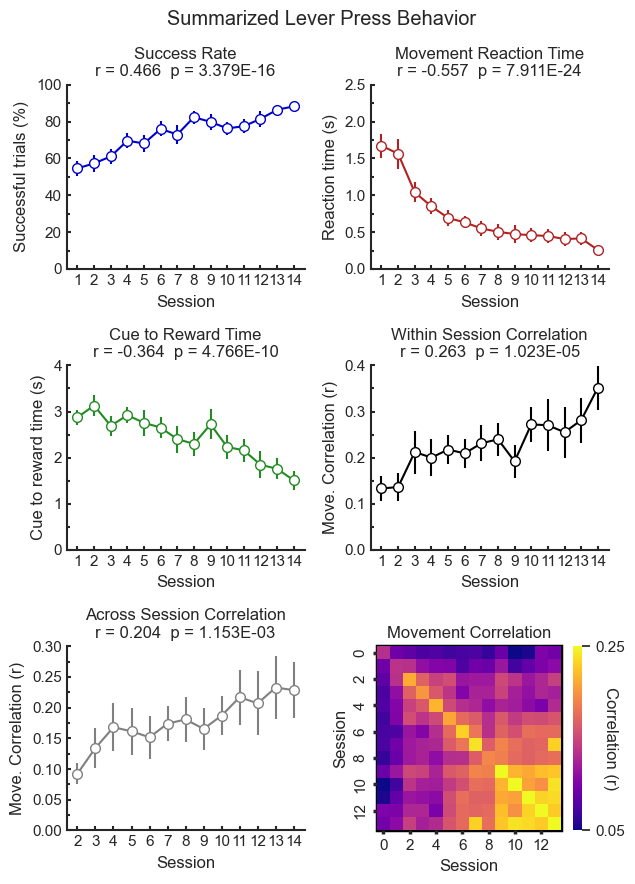

In [8]:
figure_path = r'C:\Users\Jake\Desktop\Figures'

# Specify if you want to save grouped figures
group_fig_save = True
group_fig_path = os.path.join(figure_path, "grouped_data", experiment_directory, group_directory)
if not os.path.isdir(group_fig_path):
    os.makedirs(group_fig_path)

# Plot the grouped data
colors = {"success": "mediumblue", "reaction_time": "firebrick", "cue_to_reward": "forestgreen", 
          "within": "black", "across":"grey", "cmap": "plasma"}
ylims = {"success": (0,100), "reaction_time": (0,2.5), "cue_to_reward": (0,4), "within": (0,0.4), "across": (0,0.3), "cmap": (0.05,0.25)}
grouped_data.plot_data(figsize=(6.5,9),colors=colors, plot_ind=False, ylims=ylims, save=group_fig_save, save_path=group_fig_path)

### Visualize single session lever presses

In [ ]:
# specify which mouse and which session to plot
mouse = summed_data[-1]
session = 1

# Specify if you want to save the figure
save_press = False
individual_lever_path = os.path.join(figure_path, "individual_mice", mouse.mouse_id)
if not os.path.isdir(individual_lever_path):
    os.mkdir(individual_lever_path)
    
# Plot the lever press traces
bplot.plot_session_rewarded_lever_presses(mouse, session, x_lim=(0,2400), figsize=(4,5), 
                                          save=save_press, save_path=individual_lever_path)

In [10]:

path = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW231\imaging\FOV1"
fname = "JW231_230902_imaging_data.pickle"

data = load_pickle([os.path.join(path, fname)])[0]

In [12]:
data.__dict__.keys()

dict_keys(['filename', 'mouse_id', 'date', 'parameters', 'ROI_ids', 'ROI_flags', 'ROI_positions', 'fluorescence', 'processed_fluorescence', 'drifting_baseline', 'dFoF', 'processed_dFoF', 'activity_trace', 'floored_trace', 'deconvolved_spikes', 'spine_pixel_intensity', 'dend_segment_intensity', 'spine_volume', 'corrected_spine_pixel_intensity', 'corrected_dend_segment_intensity', 'corrected_spine_volume'])

In [30]:
dFoF = data.processed_dFoF["Spine"]

In [31]:
dFoF.shape

(26429, 38)

<IPython.core.display.Javascript object>


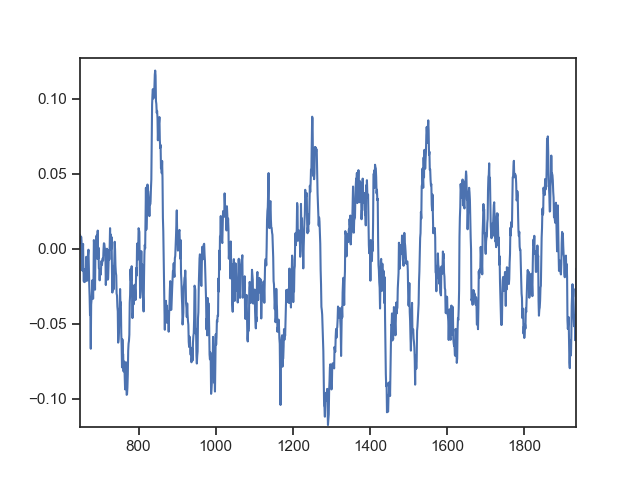

<IPython.core.display.Javascript object>


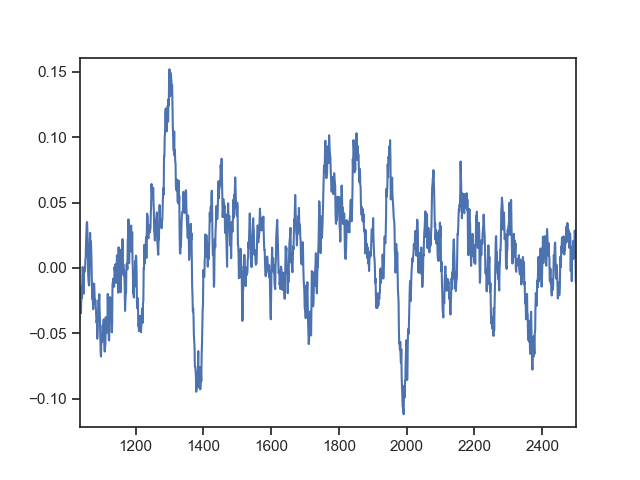

<IPython.core.display.Javascript object>


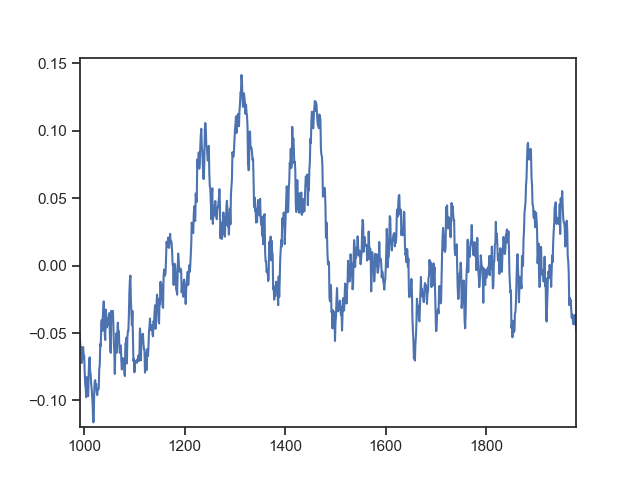

<IPython.core.display.Javascript object>


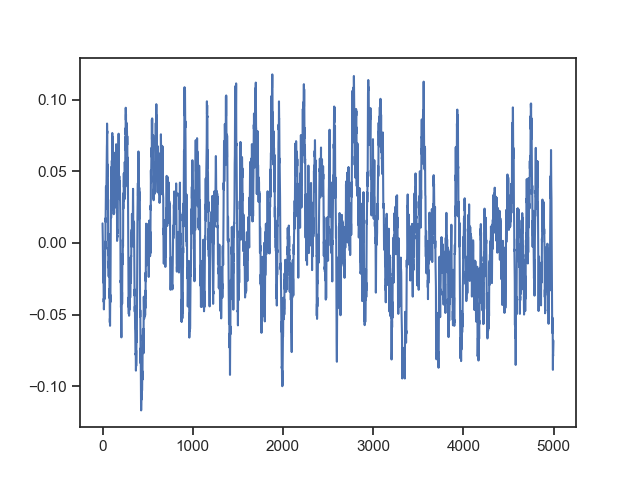

<IPython.core.display.Javascript object>


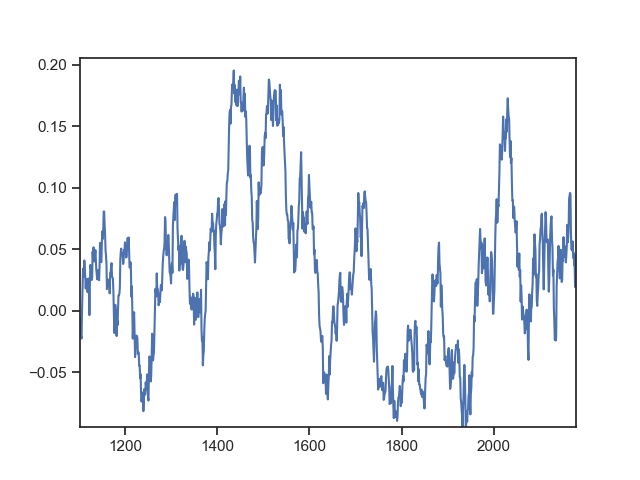

<IPython.core.display.Javascript object>


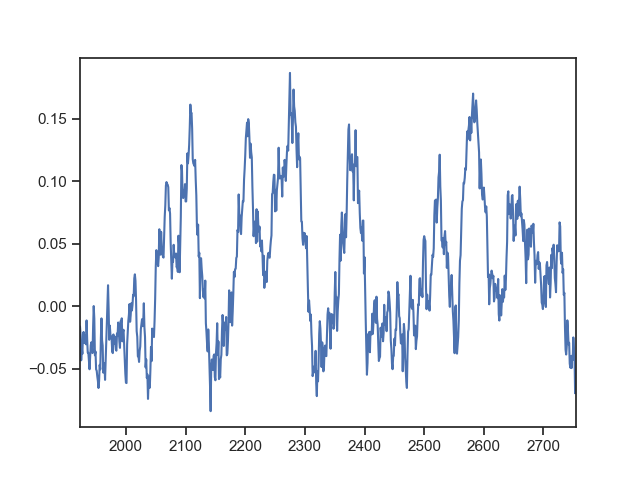

<IPython.core.display.Javascript object>


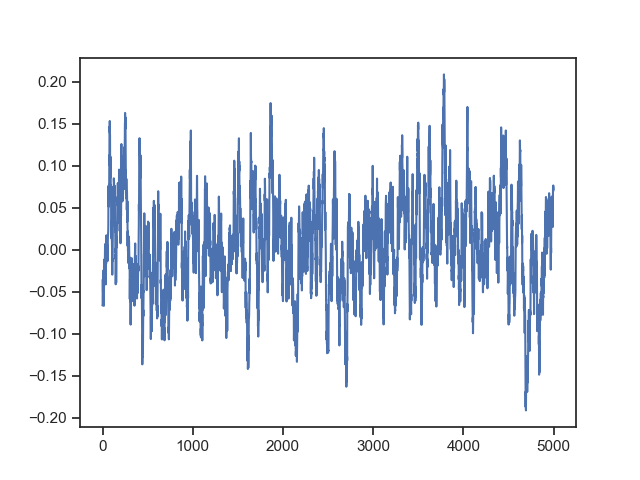

<IPython.core.display.Javascript object>


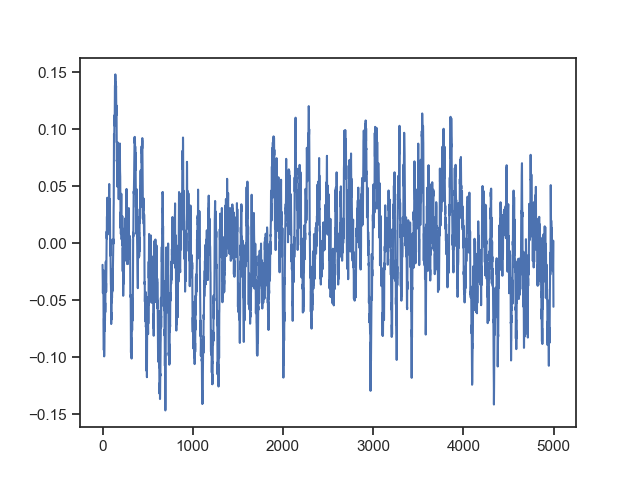

<IPython.core.display.Javascript object>


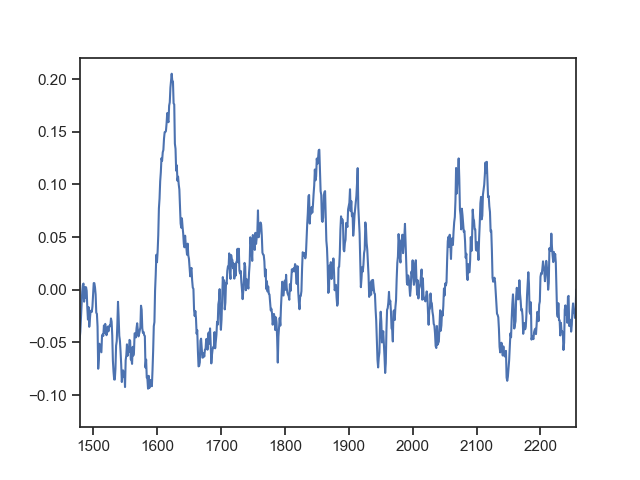

<IPython.core.display.Javascript object>


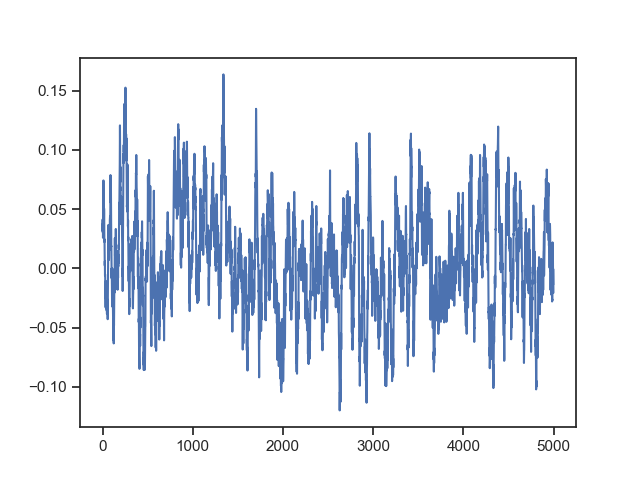

In [33]:
import matplotlib.pyplot as plt
%matplotlib notebook

for i in range(10):
    plt.figure()
    plt.plot(dFoF[5000:10000, i])

In [ ]:
a[c]

In [ ]:
b = [1, 2, 3, 4, 1]

In [ ]:
b[c]

In [ ]:
c = "Hello World"

In [ ]:
import numpy as np
a = np.array([[1,1,1],
              [2,2,2],
              [3,3,3]])
b = a.T
print(f"A: {a}")
print(f"B {b}")

In [ ]:
c = np.array([[0,1,0],
              [1,0,1],
              [0,1,0]])

In [ ]:
1 - c